In [78]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [35]:
import bt #백테스팅
import yfinance as yf #주가크롤링

import pandas as pd

### 주가 데이터 로드

In [67]:
# 백테스팅 날짜 선정
start = '2015-01-01'
end = '2020-12-31'

In [68]:
symbol = ['XLF', 'XLY', 'XLP', 'XLK', 'XLV']
# 금융, 임의소비재, 필수소비재, 정보기술, 헬스케어

df = yf.download(symbol, start, end)
df = df['Adj Close']
df

[*********************100%***********************]  5 of 5 completed


Ticker,XLF,XLK,XLP,XLV,XLY
Date,,,,,
2015-01-02 00:00:00+00:00,16.656860,36.498814,37.333607,58.564083,64.070160
2015-01-05 00:00:00+00:00,16.306614,35.941647,37.071064,58.265423,62.844727
2015-01-06 00:00:00+00:00,16.057402,35.508305,37.024750,58.069164,62.218613
2015-01-07 00:00:00+00:00,16.225788,35.808994,37.657902,59.434471,63.202499
2015-01-08 00:00:00+00:00,16.468267,36.596100,38.229305,60.449947,64.150635
...,...,...,...,...,...
2020-12-23 00:00:00+00:00,27.000004,124.272270,60.260090,104.894226,152.933273
2020-12-24 00:00:00+00:00,27.037357,125.096176,60.559628,105.196220,153.253647
2020-12-28 00:00:00+00:00,27.168110,126.511337,61.040688,105.460442,155.000870


<Axes: xlabel='Date'>

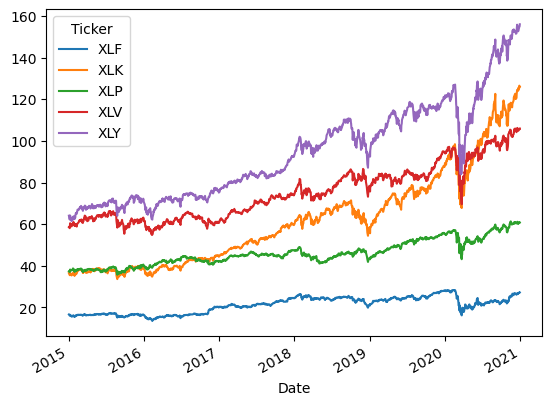

In [69]:
df.plot()

In [70]:
df.isnull().sum()

Ticker
XLF    0
XLK    0
XLP    0
XLV    0
XLY    0
dtype: int64

In [71]:
df = df.dropna()

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
XLF,1510.0,21.126101,3.829529,13.498845,16.745662,21.738541,24.300930,28.373857
XLK,1510.0,61.751760,22.825961,33.628635,40.296474,59.487360,74.202951,126.511337
XLP,1510.0,46.057415,6.025622,35.723537,41.968844,44.986275,50.454062,61.344002
XLV,1510.0,75.046163,13.070643,54.972000,62.926123,73.591724,83.509773,106.202225
XLY,1510.0,94.172948,23.029341,61.503029,72.572069,91.034977,110.568806,155.981293


### 알고리즘 로직 정의

In [ ]:
import bt
import pandas as pd

# 금리 변화와 자산 상관 분석 데이터 로드
rate_data = pd.read_csv('금리변화와 각 자산간의 상관분석데이터.csv', index_col='Date', parse_dates=True)

# 커스텀 알고리즘: 금리 변화에 따라 리밸런싱
class InterestRateRebalance(bt.Algo):
    def __init__(self, rate_col):
        self.rate_col = rate_col

    def __call__(self, target):
        # 가장 최근의 금리 데이터를 가져옴
        latest_rate_change = target.get_data(self.rate_col).iloc[-1]

        # 금리 변화에 따른 리밸런싱 로직 작성
        if latest_rate_change != 0:  # 금리 변화가 발생한 경우
            print(f"금리 변화 발생: {latest_rate_change}")
            target.rebalance()  # 리밸런싱 수행

        return True

# 전략 설정
df_port = bt.Strategy('df_port', [
    bt.algos.SelectAll(),
    bt.algos.WeighSpecified(**{
        'XLF': 0.20,
        'XLK': 0.20,
        'XLP': 0.20,
        'XLV': 0.20,
        'XLY': 0.20
    }),
    InterestRateRebalance('InterestRateChange'),  # 커스텀 알고리즘 추가
    bt.algos.Rebalance()
])

# 백테스트 실행
test = bt.Backtest(df_port, rate_data)
res = bt.run(test)

# 결과 출력
res.display()
res.plot()

In [ ]:
import bt
import pandas as pd

# 금리 변화와 자산 상관 분석 데이터 로드
rate_data = pd.read_csv('금리데이터.csv')

# 커스텀 알고리즘: 금리 변화에 따라 리밸런싱
class InterestRateRebalance(bt.Algo):
    def __init__(self, rate_col):

    def __call__(self, target):

        # 금리 변화에 따른 리밸런싱 로직 작성

        return True

# 전략 설정
df_port = bt.Strategy('df_port', [
    bt.algos.SelectAll(),
    bt.algos.WeighSpecified(**{
        'XLF': 0.20,
        'XLK': 0.20,
        'XLP': 0.20,
        'XLV': 0.20,
        'XLY': 0.20
    }),
    InterestRateRebalance('InterestRateChange'),  # 커스텀 알고리즘 추가
    bt.algos.Rebalance()
])

# 백테스트 실행
test = bt.Backtest(df_port, rate_data)
res = bt.run(test)

# 결과 출력
res.display()
res.plot()

위 코드를 참고해서 "금리변화에 따른 리밸런싱" 로직을 만들고자 함.
금리데이터csv는 '날짜(일 단위)', '금리' 두 칼럼으로 이뤄져있고, 변홯

### 전략 설정 및 백테스팅

In [82]:
# 전략 설정
df_port = bt.Strategy('df_port', [
    bt.algos.SelectAll(),
    # bt.algos.WeighSpecified(**{
    #     'XLF': 0.20,
    #     'XLK': 0.20,
    #     'XLP': 0.20,
    #     'XLV': 0.20,
    #     'XLY': 0.20

    # }),
    bt.algos.WeighEqually(),
    #bt.algos.RunQuarterly(),
    bt.algos.Rebalance()
])

In [83]:
# 백테스트 생성
backtest_df = bt.Backtest(df_port, df)  # 파라미터 = 전략, 주가데이터

In [84]:
# 백테스트 실행
result = bt.run(backtest_df) # 두종류 이상의 포트폴리오 넣을 수 있음
result

100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


{'df_port': <ffn.core.PerformanceStats at 0x168ade6c0>}

In [85]:
result.prices

,df_port
2015-01-01 00:00:00+00:00,100.000000
2015-01-02 00:00:00+00:00,100.000000
2015-01-05 00:00:00+00:00,98.649093
2015-01-06 00:00:00+00:00,97.822071
2015-01-07 00:00:00+00:00,99.296746
...,...
2020-12-23 00:00:00+00:00,212.629267
2020-12-24 00:00:00+00:00,213.392833
2020-12-28 00:00:00+00:00,215.014562
2020-12-29 00:00:00+00:00,214.751990


In [86]:
# 결과에 대한 평가
result.prices.to_returns() #-> 수익률 환산

,df_port
2015-01-01 00:00:00+00:00,NaN
2015-01-02 00:00:00+00:00,0.000000
2015-01-05 00:00:00+00:00,-0.013509
2015-01-06 00:00:00+00:00,-0.008383
2015-01-07 00:00:00+00:00,0.015075
...,...
2020-12-23 00:00:00+00:00,0.003030
2020-12-24 00:00:00+00:00,0.003591
2020-12-28 00:00:00+00:00,0.007600
2020-12-29 00:00:00+00:00,-0.001221


In [88]:
result.display()

Stat                 df_port
-------------------  ----------
Start                2015-01-01
End                  2020-12-30
Risk-free rate       0.00%

Total Return         115.13%
Daily Sharpe         0.80
Daily Sortino        1.20
CAGR                 13.63%
Max Drawdown         -32.02%
Calmar Ratio         0.43

MTD                  3.30%
3m                   11.04%
6m                   21.78%
YTD                  18.46%
1Y                   18.71%
3Y (ann.)            14.66%
5Y (ann.)            14.99%
10Y (ann.)           -
Since Incep. (ann.)  13.63%

Daily Sharpe         0.80
Daily Sortino        1.20
Daily Mean (ann.)    14.43%
Daily Vol (ann.)     18.06%
Daily Skew           -0.61
Daily Kurt           19.22
Best Day             9.30%
Worst Day            -11.37%

Monthly Sharpe       1.00
Monthly Sortino      1.80
Monthly Mean (ann.)  14.47%
Monthly Vol (ann.)   14.43%
Monthly Skew         -0.33
Monthly Kurt         1.18
Best Month           12.42%
Worst Month          -10.75

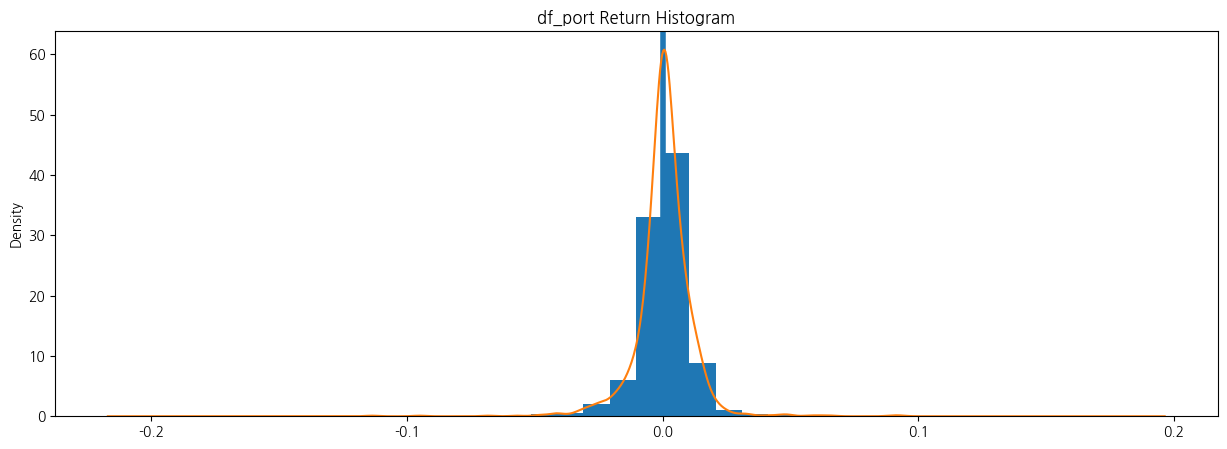

In [80]:
result.plot_histogram()

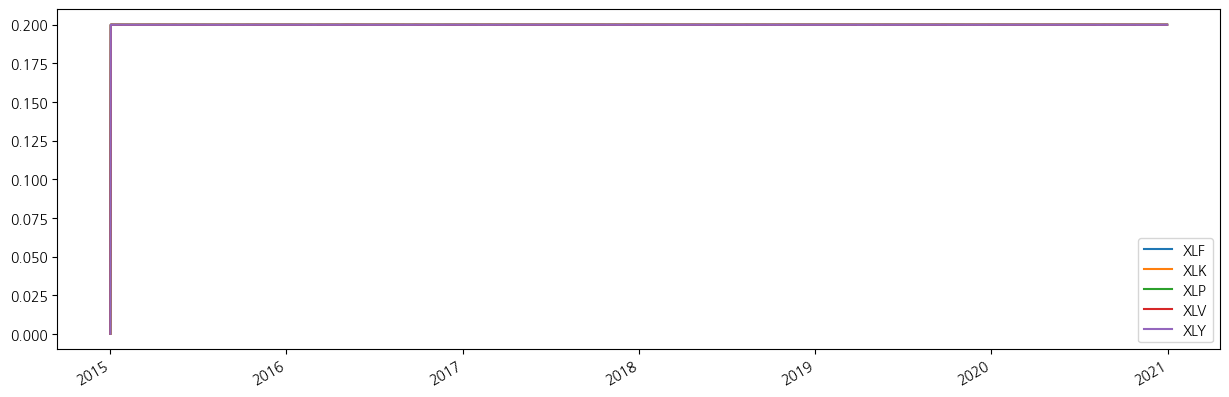

In [81]:
result.plot_security_weights()